In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import os
import numpy as np
from matplotlib import pyplot as plt

sys.path.insert(1, sys.path[0] + '/..')
from src.data.dataset import read_image
from src.data.patcher import patch_volume, reconstruct_volume
from src.data.seg2box import extract_boxes_from_patches, stich_boxes_to_patch

## Validate Patching and Re-Patching

In [9]:
data_dir = '../data'
split = 'val'
img_id = 'RibFrac424'
patch_size = [128, 128, 128]

img, _ = read_image(os.path.join(data_dir, 'raw', split, 'images', f'{img_id}-image.nii.gz'))
print(img.shape)

patches = patch_volume(img, patch_size=patch_size)
print(patches.shape)

(512, 512, 408)
(64, 128, 128, 128)


In [10]:
reconstructed = reconstruct_volume(patches, img.shape)
print(reconstructed.shape)

(512, 512, 408)


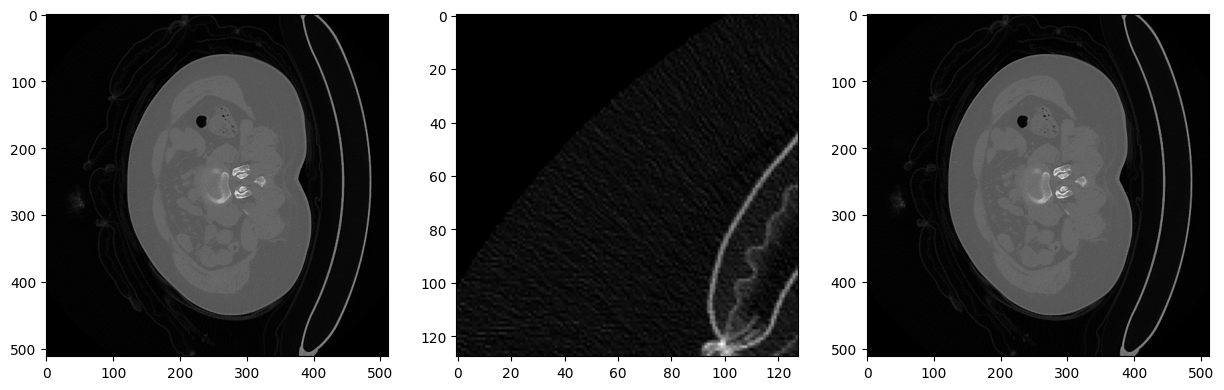

In [11]:
plt.figure(figsize=(15, 15))
z = 10
plt.subplot(1, 3, 1)
plt.imshow(img[:, :, z], cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(patches[0, :, :, 0], cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(reconstructed[:, :, z], cmap='gray')

In [12]:
np.testing.assert_array_equal(img, reconstructed)

## Validate Boxing and Re-Boxing

In [13]:
label_data, _ = read_image(os.path.join(data_dir, 'raw', split, 'labels', f'{img_id}-label.nii.gz'))
label_patches = patch_volume(label_data, patch_size=patch_size)
img_boxes, label_boxes, bounding_boxes_in_patch = extract_boxes_from_patches(patches, label_patches)
print(len(img_boxes), len(img_boxes[38]))

64 2


In [14]:
print(bounding_boxes_in_patch)

{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: [], 10: [], 11: [], 12: [], 13: [], 14: [], 15: [], 16: [], 17: [], 18: [], 19: [], 20: [], 21: [], 22: [], 23: [], 24: [], 25: [], 26: [], 27: [], 28: [], 29: [], 30: [], 31: [], 32: [], 33: [], 34: [], 35: [], 36: [], 37: [[127, 61, 9, 1, 6, 10], [85, 29, 62, 13, 9, 12]], 38: [[92, 45, 12, 18, 17, 17], [74, 58, 44, 19, 17, 14]], 39: [], 40: [[66, 83, 107, 30, 19, 21]], 41: [[67, 85, 0, 20, 15, 4], [97, 77, 64, 31, 26, 24], [103, 71, 94, 25, 25, 21], [109, 72, 126, 18, 17, 2]], 42: [[93, 69, 0, 32, 24, 17]], 43: [], 44: [], 45: [], 46: [], 47: [], 48: [], 49: [], 50: [], 51: [], 52: [], 53: [[0, 59, 7, 14, 16, 18]], 54: [], 55: [], 56: [], 57: [[0, 76, 64, 6, 15, 18], [0, 69, 94, 7, 16, 16]], 58: [], 59: [], 60: [], 61: [], 62: [], 63: []}


In [15]:
stiched = stich_boxes_to_patch(bounding_boxes_in_patch[38], label_boxes[38], patch_size)
print(stiched.shape)

(128, 128, 128)


92 45 12 110 62 29


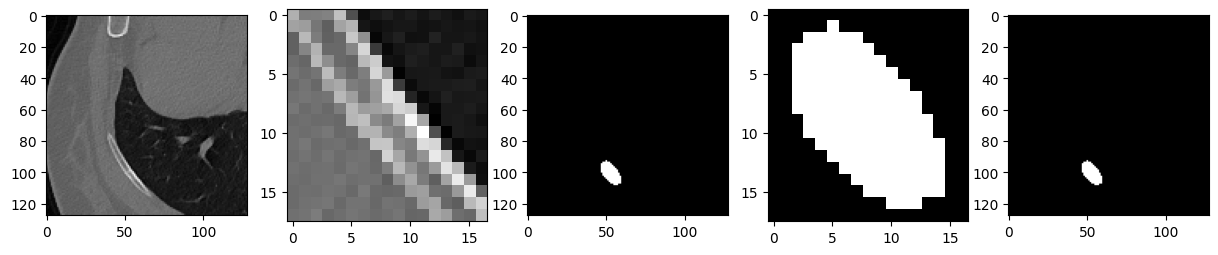

In [16]:
plt.figure(figsize=(15, 15))
x, y, z = bounding_boxes_in_patch[38][0][0], bounding_boxes_in_patch[38][0][1], bounding_boxes_in_patch[38][0][2]
width, height, depth = bounding_boxes_in_patch[38][0][3], bounding_boxes_in_patch[38][0][4], bounding_boxes_in_patch[38][0][5]
print(x, y, z, x+width, y+height, z+depth)
plt.subplot(1, 5, 1)
plt.imshow(patches[38][:, :, z+int(depth/2)], cmap='gray')
plt.subplot(1, 5, 2)
plt.imshow(patches[38][x:x+width, y:y+height, z+int(depth/2)], cmap='gray')
plt.subplot(1, 5, 3)
plt.imshow(label_patches[38][:, :, z+int(depth/2)], cmap='gray')
plt.subplot(1, 5, 4)
plt.imshow(label_patches[38][x:x+width, y:y+height, z+int(depth/2)], cmap='gray')
plt.subplot(1, 5, 5)
plt.imshow(stiched[:, :, z+int(depth/2)], cmap='gray')

74 58 44 93 75 58


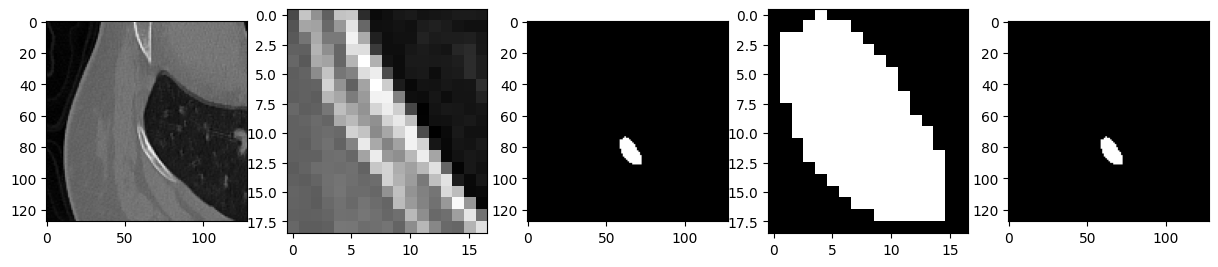

In [17]:
plt.figure(figsize=(15, 15))
x, y, z = bounding_boxes_in_patch[38][1][0], bounding_boxes_in_patch[38][1][1], bounding_boxes_in_patch[38][1][2]
width, height, depth = bounding_boxes_in_patch[38][1][3], bounding_boxes_in_patch[38][1][4], bounding_boxes_in_patch[38][1][5]
print(x, y, z, x+width, y+height, z+depth)
plt.subplot(1, 5, 1)
plt.imshow(patches[38][:, :, z+int(depth/2)], cmap='gray')
plt.subplot(1, 5, 2)
plt.imshow(patches[38][x:x+width, y:y+height, z+int(depth/2)], cmap='gray')
plt.subplot(1, 5, 3)
plt.imshow(label_patches[38][:, :, z+int(depth/2)], cmap='gray')
plt.subplot(1, 5, 4)
plt.imshow(label_patches[38][x:x+width, y:y+height, z+int(depth/2)], cmap='gray')
plt.subplot(1, 5, 5)
plt.imshow(stiched[:, :, z+int(depth/2)], cmap='gray')

In [18]:
print(label_patches[38].shape)

(128, 128, 128)
